## Machine Learning - Unsupervised method

Problem domain: Analysis of Bitcoin stock market from 02th April 2023 to 02nd April 2024

Bitcoin (BTC) is a cryptocurrency launched in 2010. Users are able to generate BTC through the process of mining. Bitcoin has a current supply of 19,682,031. The last known price of Bitcoin is 64,315.76152533 USD and is down -4.63 over the last 24 hours. It is currently trading on 10992 active market(s) with $58,106,794,683.09 traded over the last 24 hours. More information can be found at https://bitcoin.org/ (“Bitcoin USD (BTC-USD) Stock Price, Quote, History & News”)

The objective of this project is implement unsupervised ML learning method using K-Means and DBSCAN clustering algorithms which will try to recognize patterns into the dataset. 


### Importing libraries to perform data manaipulation and anaylysis  

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns 






### Read dataset 

In [2]:
df = pd.read_csv('BTC-USD.csv')

### Visualizing firt row of the dataset 

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-02,28462.845703,28518.958984,27884.087891,28199.308594,28199.308594,12284641999
1,2023-04-03,28183.080078,28475.623047,27276.720703,27790.220703,27790.220703,19556501327
2,2023-04-04,27795.273438,28433.742188,27681.304688,28168.089844,28168.089844,15284538859
3,2023-04-05,28169.726563,28739.238281,27843.763672,28177.984375,28177.984375,17052315986
4,2023-04-06,28175.226563,28178.384766,27738.759766,28044.140625,28044.140625,13837809380


### Data information

The dataset has 367 rows and 7 columns in which 5 has been defined as a float64, 1 feature as an int64 (Volume) and 1 as an object (Date). 

There is no missing values in any columns in the dataset. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       367 non-null    object 
 1   Open       367 non-null    float64
 2   High       367 non-null    float64
 3   Low        367 non-null    float64
 4   Close      367 non-null    float64
 5   Adj Close  367 non-null    float64
 6   Volume     367 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.2+ KB


### Transforming Volume feature into float64 to make the dataset uniform

In [5]:
df['Volume'] = df['Volume'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       367 non-null    object 
 1   Open       367 non-null    float64
 2   High       367 non-null    float64
 3   Low        367 non-null    float64
 4   Close      367 non-null    float64
 5   Adj Close  367 non-null    float64
 6   Volume     367 non-null    float64
dtypes: float64(6), object(1)
memory usage: 20.2+ KB


### Statistical summary 

All the columns have the count of 367

In the column Open the mean represents the value of 36566 while the median is 30315 which has a significant distance between them. The Close feature has similar values, it has mean of 36668 and median of 30318. 
The minimum value in the features vary from 24797 to 25121, whereas maximum values are 71334 to 73750. 

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,367.000000,367.000000,367.000000,367.000000,367.000000,3.670000e+02
mean,36566.133366,37245.166175,35951.784331,36668.765678,36668.765678,2.054025e+10
std,12297.066565,12727.681790,11862.108972,12383.550524,12383.550524,1.346815e+10
min,25121.673828,25735.308594,24797.167969,25124.675781,25124.675781,5.331173e+09
25%,27552.037110,27984.726562,27100.661133,27557.231445,27557.231445,1.216358e+10
50%,30315.976563,30636.029297,29966.386719,30318.496094,30318.496094,1.649319e+10
75%,42649.451172,43357.119140,41852.763672,42700.660157,42700.660157,2.387294e+10
max,73079.375000,73750.070313,71334.093750,73083.500000,73083.500000,1.028029e+11


In [7]:
#plt.style.use('classic')
plt.style.use('dark_background')
#plt.style.use('default')



C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


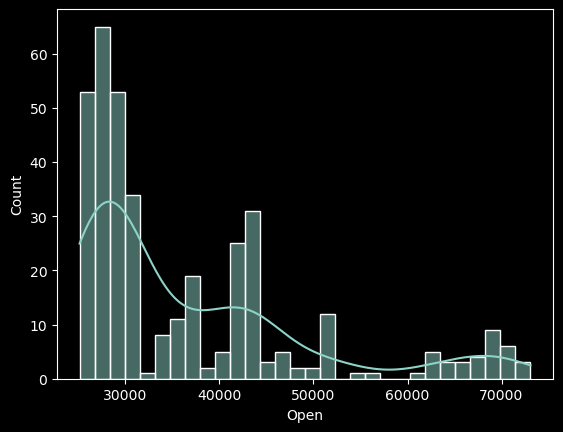

In [8]:
sns.histplot(df['Open'], bins=30, kde=True);

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


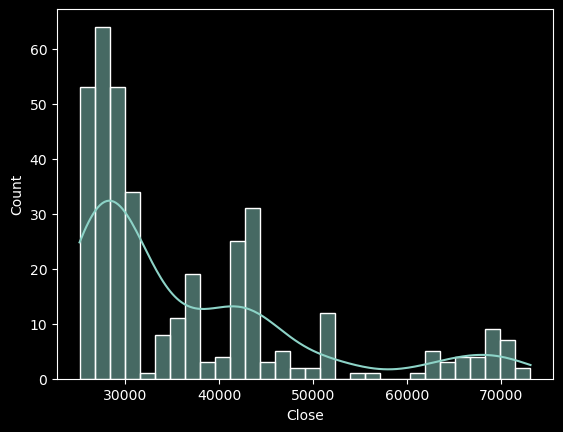

In [9]:
sns.histplot(df['Close'], bins=30, kde=True);

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


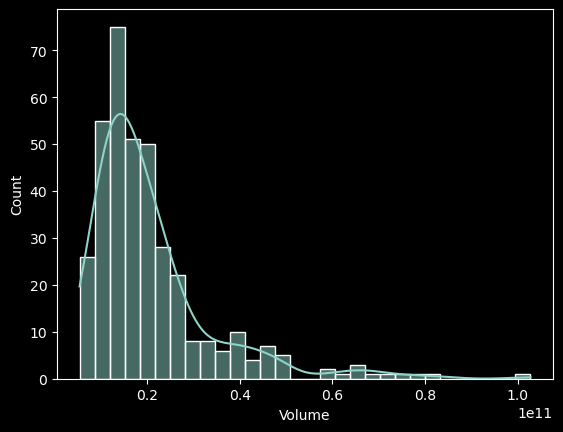

In [10]:
sns.histplot(df['Volume'], bins=30, kde=True);

<Axes: xlabel='Low', ylabel='High'>

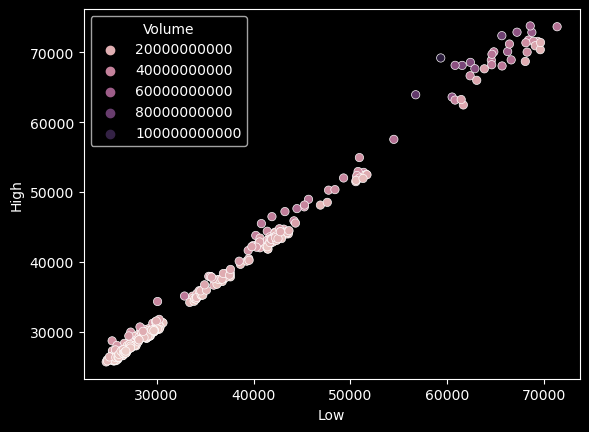

In [11]:
sns.scatterplot(data = df, x = 'Low', y = 'High', hue = 'Volume')

<Axes: xlabel='Open', ylabel='Close'>

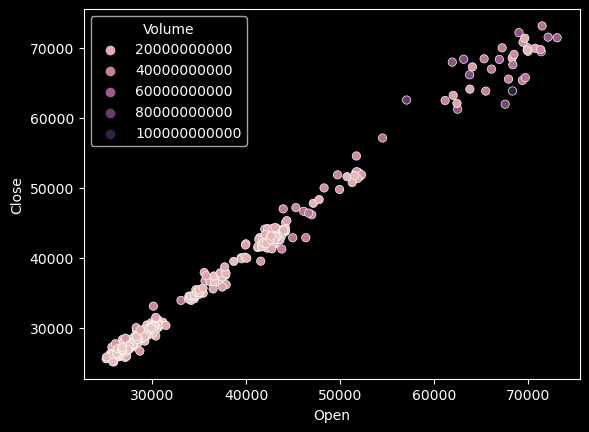

In [12]:
sns.scatterplot(data = df, x = 'Open', y = 'Close', hue = 'Volume')

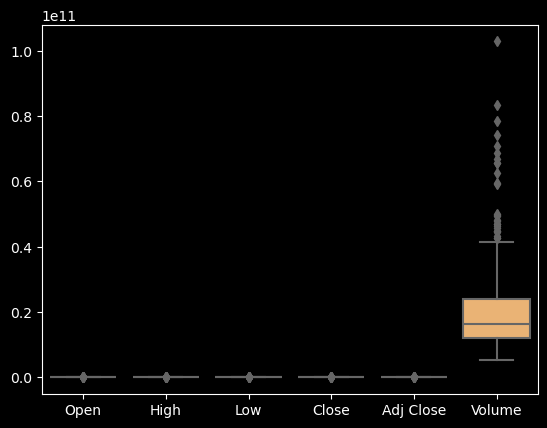

In [13]:
sns.boxplot(df);

In [14]:
df2 = df.drop(columns=['Date', 'Adj Close'])
df2.head()

,Open,High,Low,Close,Volume
0,28462.845703,28518.958984,27884.087891,28199.308594,1.228464e+10
1,28183.080078,28475.623047,27276.720703,27790.220703,1.955650e+10
2,27795.273438,28433.742188,27681.304688,28168.089844,1.528454e+10
3,28169.726563,28739.238281,27843.763672,28177.984375,1.705232e+10
4,28175.226563,28178.384766,27738.759766,28044.140625,1.383781e+10


## Normalize the data 

In order to work with distance-based algorithms, like for example the K-Means clustering the data must be normalized. Because of the different scalling of the variables, those can be weighted differently in the distance formula that has been improved in the training process. 
(Mar. 2023, www.datacamp.com/tutorial/k-means-clustering-python.)

In [15]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(df2)
transformer
RobustScaler()
transformer.transform(df2)

array([[-0.12274492, -0.13771899, -0.14115268, -0.13994106, -0.35941724],
       [-0.14127562, -0.14053806, -0.18232425, -0.16695528,  0.2616125 ],
       [-0.16696257, -0.14326248, -0.15489874, -0.1420026 , -0.1032207 ],
       ...,
       [ 2.60520143,  2.65031951,  2.68832733,  2.70844557,  0.30383856],
       [ 2.71685652,  2.64799798,  2.58568624,  2.60070907,  1.56971382],
       [ 2.6082659 ,  2.54078976,  2.34845046,  2.33688124,  2.68110922]])

## Find the best number of K

To find the optimal number of K in the KMeans clustering it will be used The Elbow Method. In this method will be focused on the percentage of variance for the different number of K. 
As the number of K increase, the variance will decrease. The aim is to select the number of clusters that adding to another cluster there is no significant change in the variance. (Avinash Navlani et al.)

As the number of K is increased it can be seen improvements in clusters and what they represent until a certain point. The value of K at which the improvement performance declines or start to get flatten will be considered the Elbow point. (Mar. 2023, www.datacamp.com/tutorial/k-means-clustering-python)


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

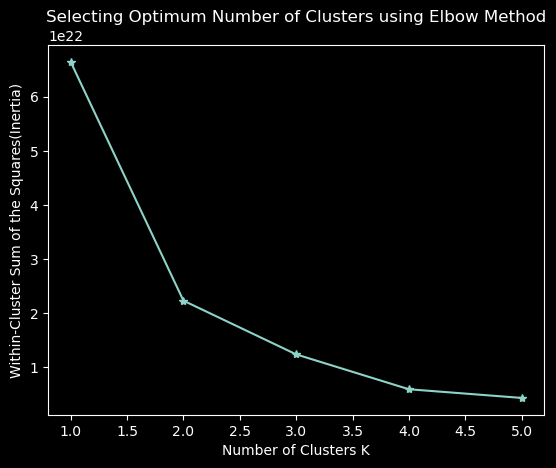

In [16]:
# import K-means
from sklearn.cluster import KMeans

wcss_list = []

# Run a loop for different value of number of cluster
for i in range(1, 6):
    
 # Create and fit the KMeans model
 kmeans_model = KMeans(n_clusters = i, random_state = 123)
 kmeans_model.fit(df2)
    
 # Add the WCSS or inertia of the clusters to the score_list
 wcss_list.append(kmeans_model.inertia_)
    
# Plot the inertia(WCSS) and number of clusters
plt.plot(range(1, 6), wcss_list, marker='*')

# set title of the plot
plt.title('Selecting Optimum Number of Clusters using Elbow Method')
# Set x-axis label
plt.xlabel('Number of Clusters K')
# Set y-axis label
plt.ylabel('Within-Cluster Sum of the Squares(Inertia)')
# Display plot
plt.show()


## Fitting and Evaluating the K-Means model

As the number of K has been found above using the ELbow method, the K-Means algorithm will be implemented using Scikit-learn library with the following parameters: 

n_clusters = It will be used 4 clusters as it is considered the optimal number os clusters according to the Elbow method. 

n_init ( 'auto' or int, default=10)  - Number of times the k-means algorithm is run with different centroid seeds 

random_state(0) - to get the same result every time the code is run. 


Fit() trains the KMeans model on the data.





In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, random_state = 0, n_init='auto')      #n_init : 'auto' or int, default=10
                                                                      #Number of times the k-means algorithm is run with different centroid seeds.
kmeans.fit(df2)          #Fit trains de KMeand model on the data 

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=4, n_init='auto', random_state=0)

### Visualizing the data that has been fit()

What the KMeans algorithm does is to try to find cluster centers and assign each data pointo to its closest cluster center, grouping them into instinct clusters.
Each cluster center is considered as the mean of the data points that has been linked it it. (Müller and Guido). 

It can be seen below the data using the columns 'Open' and 'Volume' has been split into 4 groups that are labeled (0,1,2,3) and are represented in four different ton of colours. 


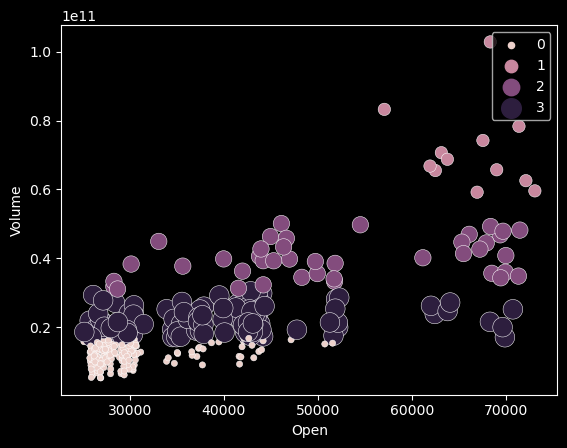

In [18]:
sns.scatterplot(data = df2, x = 'Open', y = 'Volume', hue = kmeans.labels_, size=kmeans.labels_, sizes=(20, 200), legend='full');


It can be seen a good representation of the group 3 with volumes that goes from 0.2 to 0.4 and it has a good data points concentration in the open values that represents 30000 and 40000. 

The group 1 has a few data points and it showns to have the highest volume which starts from 0.6, but it also has the highest value in the opening. 

Group 0 though has been represented with the lowest volume and open values from 30000 to 50000. 


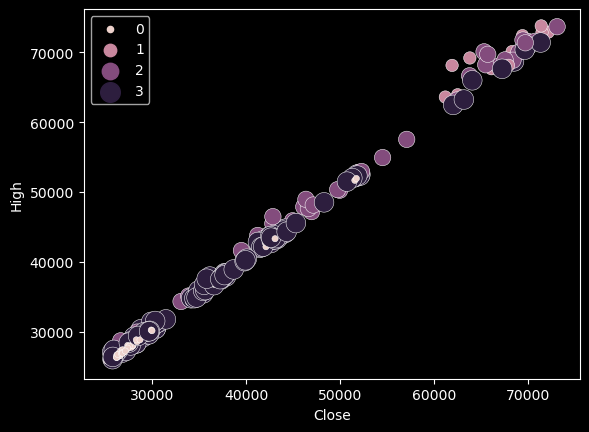

In [19]:
sns.scatterplot(data = df2, x = 'Close', y = 'High', hue = kmeans.labels_, size=kmeans.labels_, sizes=(20, 200), legend='full');

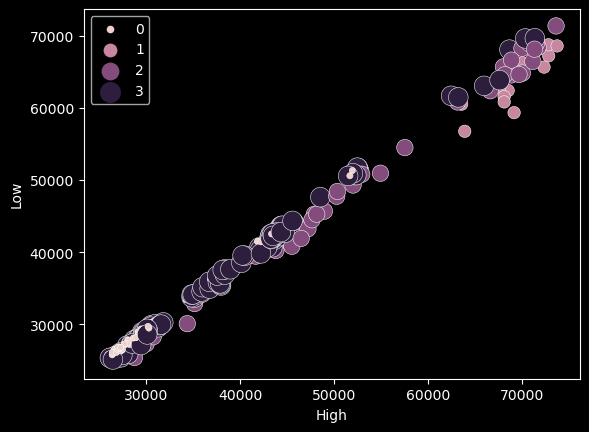

In [20]:
sns.scatterplot(data = df2, x = 'High', y = 'Low', hue = kmeans.labels_, size=kmeans.labels_, sizes=(20, 200), legend='full');

When the features low and high has been visualizing, it can be seen that the KMeans clustering has not performed well in this type of data. It can be visualized the four group of clusters, however their direction is going towards the diagonal. 
KMeans algorithm only considers the distance to the nearest cluster center and all the directions for each cluster fairly important.  (Müller and Guido)

<Axes: ylabel='Volume'>

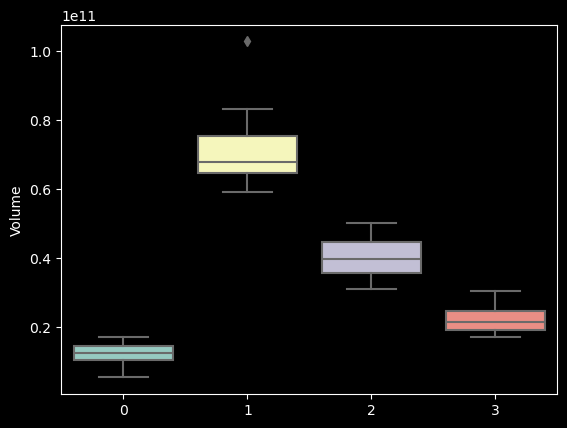

In [21]:
sns.boxplot(x = kmeans.labels_, y = df2['Volume'])

Using the boxplot it shows the distribution of the volume for each cluster that has been created by the KMeans algorithm. 

It can be seen that the group 1 has the highest volume followed by group 2 when compared to other groups. 

### Evaluate Performance of KMeans using Sillouette method 

In order to evaluate the clustering algorithm it has been used the Sillouette score method which is also part of Sklearn.metrics. 


The sillouette score is 0.5988 which is a positive value indicating that the clusters are well separated. 

In [22]:
from sklearn.metrics import silhouette_score

silhouette_score(df2, kmeans.labels_, metric='euclidean')

0.598838364009892

## DBSCAN clustering

In [24]:
#import DBSCAN from Sklearn 
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3, min_samples=2) #The model has initialize with parameters: eps=3 and min_samples= 2 
dbscan.fit(df2[['Open', 'Volume']])   #Train the model by calling Fit()
dbscan.labels_                   



array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

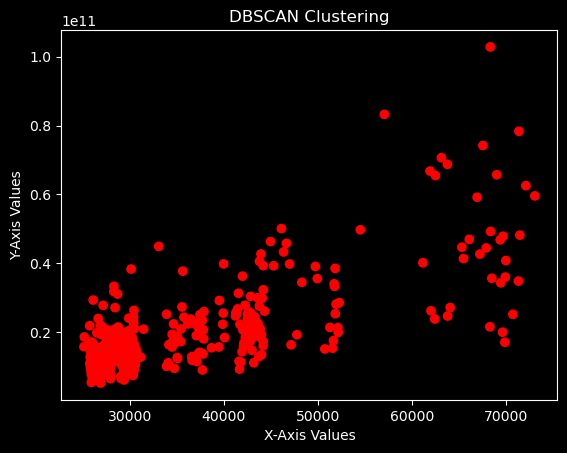

In [25]:
# Plot the Clusters
plt.scatter(df2['Open'], df2['Volume'], c=dbscan.labels_, marker="o",cmap="bwr_r")

# Set title of the plot
plt.title('DBSCAN Clustering')
# Set x-axis label
plt.xlabel('X-Axis Values')
# Set y-axis label
plt.ylabel('Y-Axis Values')
# Display the plot
plt.show()

In [26]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(df2[['Open', 'Volume']])

distances, indices = nbrs.kneighbors(df2[['Open', 'Volume']])

print(distances, indices)


[[0.00000000e+00 1.09319048e+08 1.21403119e+08]
 [0.00000000e+00 2.64562450e+07 7.59718310e+07]
 [0.00000000e+00 1.26539863e+07 6.16002590e+07]
 ...
 [0.00000000e+00 4.18503707e+07 7.03184814e+07]
 [0.00000000e+00 3.61541548e+08 4.98626735e+08]
 [0.00000000e+00 3.25283425e+08 8.97710345e+08]] [[  0   7 145]
 [  1  66  16]
 [  2  92  46]
 ...
 [364 321   9]
 [365 316 361]
 [366 346 340]]


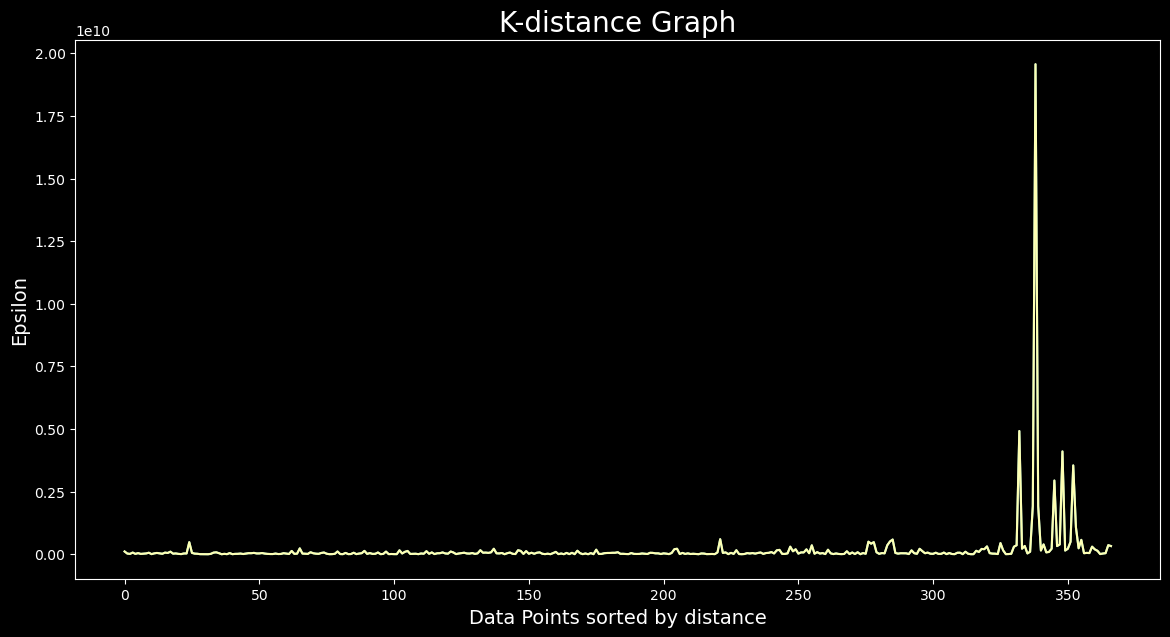

In [27]:
# Plotting K-distance Graph
# distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize = (14,7))
plt.plot(distances)
plt.title('K-distance Graph', fontsize = 20)
plt.xlabel('Data Points sorted by distance', fontsize = 14)
plt.ylabel('Epsilon', fontsize = 14)

plt.plot(distances)

In [43]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=40, min_samples=5) #The model has initialize with parameters: eps=3 and min_samples= 2 
dbscan.fit(df2[['Open', 'Volume']])   #Train the model by calling Fit()


DBSCAN(eps=40)

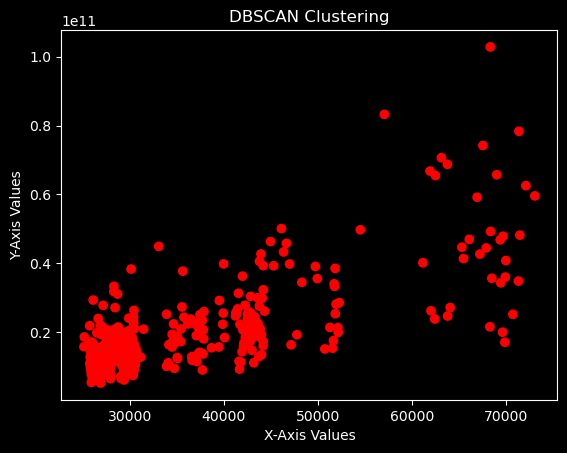

In [44]:
# Plot the Clusters
plt.scatter(df2['Open'], df2['Volume'], c=dbscan.labels_, marker="o",cmap="bwr_r")

# Set title of the plot
plt.title('DBSCAN Clustering')
# Set x-axis label
plt.xlabel('X-Axis Values')
# Set y-axis label
plt.ylabel('Y-Axis Values')
# Display the plot
plt.show()

In [59]:
db_param_options = [[20,5],[25,5],[30,5],[25,7],[35,7],[40,5]]
for ep,min_sample in db_param_options:
    # Generate clusters using DBSCAN
    db = DBSCAN(eps=ep, min_samples = min_sample)
    db_clusters = db.fit_predict(df2[['Open', 'Volume']])
    print("Eps: ", ep, "Min Samples: ", min_sample)
    

Eps:  20 Min Samples:  5
Eps:  25 Min Samples:  5
Eps:  30 Min Samples:  5
Eps:  25 Min Samples:  7
Eps:  35 Min Samples:  7
Eps:  40 Min Samples:  5


In [61]:
# Generate clusters using DBSCAN
db = DBSCAN(eps = 40, min_samples = 5)
db_clusters = db.fit_predict(df2[['Open', 'Volume']])

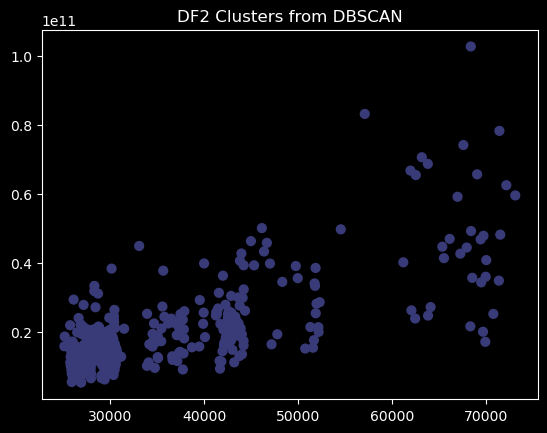

In [66]:
plt.title("DF2 Clusters from DBSCAN")
plt.scatter(df2['Open'], df2['Volume'], c=db_clusters, s=40, cmap='tab20b')
plt.show()